In [2]:
import pickle

with open('yk_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

yk_full = data['yk_full']
yk_dropped = data['yk_dropped']

In [3]:
yk_full

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
0,temperature,Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1,Device_Test_Time,Outlier/Longtail,1,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,...,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000,0.398593,7.040191e-157
2,Part_Id,Outlier/Longtail,1,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,...,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000,0.955334,3.218504e-84
3,g2bist_efuse_blank_read_f_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
4,tdf_50k_2_f_:Functional[1],Other,0,functional,-5.551115e-17,-0.577350,1.154701,0.577350,0.000000,0.000000,...,0.250000,-3.000000,1.662769,-0.577350,0,4,0.468149,0.249377,0.629776,1.240726e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,tdf_90k_5_p_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1021,tdf_90k_6_p_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1022,tdf_90k_7_p_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1023,tdf_90k_8_p_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN


In [4]:
yk_full_filled = yk_full.fillna(0)

In [5]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X = yk_full_filled.drop(columns = columns_to_drop)
y = yk_full_filled['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model with full dataset and without any feature crossing / dropping

In [138]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight={0: 1, 1: 10})

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [139]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9414634146341463
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.92      0.96      0.94        98

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [140]:
import pickle

with open('yk_model.pkl', 'wb') as file:
    pickle.dump(model, file)

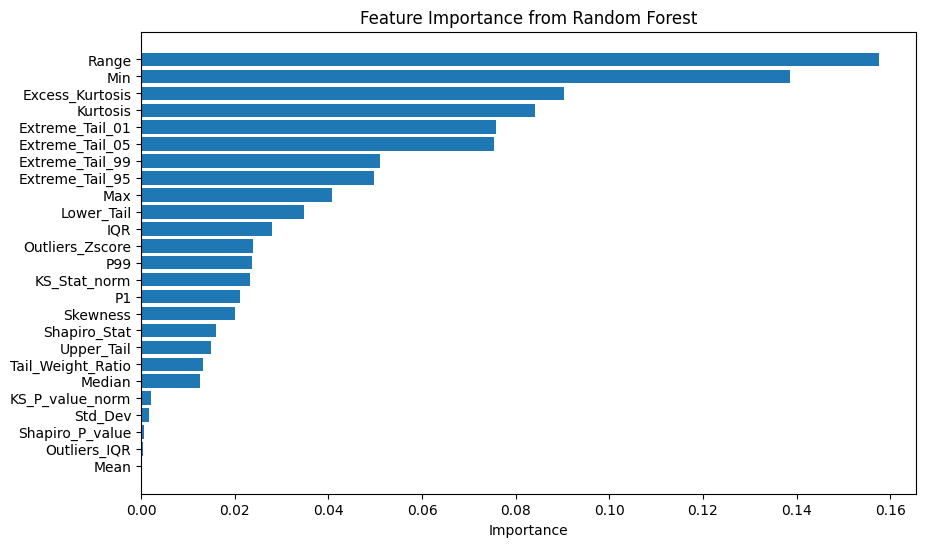

In [9]:
import pandas as pd
import matplotlib as plt

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# identify the difference in features between recalled and unrecalled to determine why it is not captured by the model 

In [10]:
# import seaborn as sns 

# for feature in X_test_positive.columns[:-1]:  # skip the 'Recalled' column
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x='Recalled', y=feature, data=X_test_positive)
#     plt.xticks(ticks=[0, 1], labels=["Unrecalled", "Recalled"])
#     plt.title(f'Boxplot of {feature}')
#     plt.show()

In [11]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (y_pred != 1)
unrecalled_points = X_test[unrecalled_mask]

recalled_mask = (y_test == 1) & (y_pred == 1)
recalled_points = X_test[recalled_mask]

# for negative class (other distributions)
negative_mask = (y_test == 0) & (y_pred == 0)
negative_points = X_test[negative_mask]

In [12]:
# check the actual distribution type of unrecalled points
yk_full_filled.iloc[unrecalled_points.index] 

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
289,io18_pspd_high_pre_:dc_ioleakage@ATEST1[1],Outlier/Longtail,1,longtail,-1.111313e-13,-0.058764,1.000007,1.268141,0.354691,-0.191540,...,0.089119,-3.191540,2.398259,-1.960975,27,0,0.077159,0.000000e+00,0.979158,3.902359e-67
539,rfu_rx_gstep_2412_A_:rbb2_0db_ref_gain@2G5GTR_...,Outlier/Longtail,1,outlier,-1.062163e-13,0.177265,1.000008,0.600406,-3.583873,14.748311,...,0.067905,11.748311,1.088663,-4.622672,2711,0,0.223528,0.000000e+00,0.593166,6.563556e-143
532,rfu_rx_gstep_2412_A_:rbb2_-6db_ref_gain@2G5GTR...,Outlier/Longtail,1,outlier,6.887230e-13,0.172392,1.000008,0.810591,-3.006045,14.159397,...,0.064032,11.159397,1.365809,-4.321483,2569,0,0.149675,0.000000e+00,0.728762,1.072872e-130
526,rfu_rx_gstep_2412_A_:biquad_lpf_12db@2G5GTR_A[1],Outlier/Longtail,1,longtail,6.583248e-14,0.010747,1.000008,1.101479,-0.050802,-0.168533,...,0.128932,-3.168533,2.199002,-2.220751,5,0,0.050786,1.948087e-147,0.988460,1.702925e-54


In [13]:
unrecalled_points.describe() # 8 points

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000e+00,4.000000,4.000000e+00
mean,1.343020e-13,0.075410,1.000008e+00,0.945154,-1.571507,7.136909,-8.377250,2.762147,11.139397,0.401160,...,0.087497,4.136909,1.762933,-3.281470,1328.000000,0.0,0.125287,4.870218e-148,0.822387,4.257312e-55
std,3.786631e-13,0.118271,1.983988e-07,0.297611,2.010829,8.452306,6.283078,1.215980,5.472085,0.132787,...,0.029743,8.452306,0.634073,1.384351,1516.102459,0.0,0.077702,9.740435e-148,0.194478,8.514624e-55
min,-1.111313e-13,-0.058764,1.000007e+00,0.600406,-3.583873,-0.191540,-14.651065,1.824401,5.694370,0.248263,...,0.064032,-3.191540,1.088663,-4.622672,5.000000,0.0,0.050786,0.000000e+00,0.593166,6.563556e-143
25%,-1.074450e-13,-0.006631,1.000008e+00,0.758044,-3.150502,-0.174284,-13.346676,2.094146,6.892450,0.321880,...,0.066937,-3.174284,1.296522,-4.396780,21.500000,0.0,0.070566,0.000000e+00,0.694863,8.046544e-131
50%,-2.019190e-14,0.091570,1.000008e+00,0.956035,-1.528423,6.995432,-8.052186,2.342970,11.014046,0.400782,...,0.078512,3.995432,1.782406,-3.271117,1298.000000,0.0,0.113417,0.000000e+00,0.853960,1.951179e-67
75%,2.215551e-13,0.173610,1.000008e+00,1.143145,0.050571,14.306626,-3.082759,3.010971,15.260992,0.480062,...,0.099073,11.306626,2.248817,-2.155807,2604.500000,0.0,0.168138,4.870218e-148,0.981484,4.257312e-55
max,6.887230e-13,0.177265,1.000008e+00,1.268141,0.354691,14.748311,-2.753563,4.538247,16.835125,0.554812,...,0.128932,11.748311,2.398259,-1.960975,2711.000000,0.0,0.223528,1.948087e-147,0.988460,1.702925e-54


In [14]:
recalled_points.describe() # 92 points

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,9.400000e+01,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,9.400000e+01
mean,-1.938754e-14,-0.034782,1.000008e+00,1.191683,-9.542616,1912.456126,-34.232701,13.198491,47.431192,0.634761,...,0.052593,1909.456126,2.094695,-2.029912,284.478723,5828.010638,0.083796,1.272026e-02,0.829275,2.049032e-10
std,5.379093e-13,0.150628,1.676785e-07,0.352546,36.334864,6220.730436,42.233783,27.444813,48.744682,0.326139,...,0.039447,6220.730436,0.603276,0.690714,431.016521,19218.216874,0.106488,7.737935e-02,0.261495,1.986610e-09
min,-2.507384e-12,-0.745631,1.000007e+00,0.131319,-170.866417,-0.825846,-198.429891,0.709779,4.363679,0.000000,...,0.000395,-3.825846,0.571973,-4.532855,2.000000,0.000000,0.002858,0.000000e+00,0.062613,3.968234e-171
25%,-1.227714e-13,-0.045672,1.000008e+00,1.150322,-3.685945,0.651710,-47.104819,3.598231,11.596935,0.501792,...,0.036624,-2.348290,1.951732,-2.295735,66.000000,0.000000,0.017878,0.000000e+00,0.824028,1.067710e-116
50%,4.513928e-16,-0.011146,1.000008e+00,1.295068,-0.308518,18.992052,-15.712988,4.955544,34.102518,0.661099,...,0.046050,15.992052,2.259584,-2.207126,166.000000,0.000000,0.032923,3.230663e-60,0.949960,1.288779e-85
75%,2.042667e-13,0.004109,1.000008e+00,1.335489,0.269196,257.750089,-5.853014,6.931255,61.105808,0.754422,...,0.054024,254.750089,2.439581,-1.829510,316.250000,0.000000,0.091786,1.925684e-18,0.986939,9.599459e-57
max,1.309922e-12,0.396948,1.000008e+00,1.961446,160.482471,35701.713870,-2.408359,219.816872,265.242062,1.491007,...,0.225069,35698.713870,3.253290,-0.247835,2587.000000,69567.000000,0.414055,6.566710e-01,0.999682,1.926090e-08


In [15]:
negative_points.describe() # 95 points

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,9.700000e+01
mean,-5.605488e-15,-0.013915,0.754392,0.957477,0.136439,-0.127900,-2.151549,7.067229,9.218778,0.410827,...,0.042715,-3.127900,1.571635,-1.368521,79.288660,2777.556701,0.106672,2.036422e-02,0.660758,1.733477e-02
std,3.479255e-13,0.182779,0.435086,0.683126,0.417973,0.461986,1.724154,29.462479,29.272822,0.372533,...,0.058494,0.461986,1.084845,0.986767,123.673458,13447.680465,0.131966,1.251983e-01,0.432900,1.215763e-01
min,-1.067968e-12,-0.807573,0.000000,0.000000,-0.834512,-1.642790,-5.405145,0.000000,0.000000,0.000000,...,0.000000,-4.642790,-0.057260,-3.696846,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,-1.002647e-14,-0.080056,1.000007,0.000000,0.000000,-0.242332,-3.612372,0.270501,2.045851,0.000000,...,0.000000,-3.242332,0.000000,-2.228748,0.000000,0.000000,0.002199,0.000000e+00,0.000294,1.441927e-173
50%,0.000000e+00,0.000000,1.000008,1.200424,0.000000,0.000000,-2.079198,3.385878,5.765873,0.417836,...,0.016810,-3.000000,2.251874,-1.533809,22.000000,0.000000,0.074473,0.000000e+00,0.929382,2.860869e-89
75%,8.479187e-16,0.034178,1.000008,1.456071,0.211524,0.014923,-0.003802,4.271286,7.839151,0.703478,...,0.053432,-2.985077,2.392149,-0.003802,118.000000,0.000000,0.126190,1.444356e-229,0.986570,1.812341e-48
max,2.921422e-12,0.577350,1.154701,2.062630,1.573129,0.953706,0.000000,263.001901,263.005703,1.946918,...,0.250000,-2.046294,3.312375,0.000000,687.000000,69176.000000,0.538431,9.075498e-01,0.999978,9.752503e-01


# Recall vs Unrecalled 
1. ks_stat mean is lower for unrecalled, indicating unrecalled points are more similar towards normality
2. outliers_iqr is way lower and zero for unrecalled, indicating unrecalled points have no outliers detected using IQR range while recalled points have alot more outliers , surprisingly negative class has way more outliers too 
3. kurtosis is close to 0 and negative for unrecalled, comapred to very high positive value for recalled, indicating that unrecalled points have a more uniform distribution compared to normality and have very much less extreme values 
4. skewness is close to 0 for unrecalled compared to negative value for recalled, indicating that unrecalled points are centered along the mean while recalled points are left skewed 


In [ ]:
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

feature_importance = model.feature_importances_

# Compare the feature distribution between correctly classified and unrecalled points
for feature in X_test.columns:
    plt.figure(figsize=(4, 2))
    sns.kdeplot(recalled_points[feature], label='Recalled (Class 1)', shade=True)
    sns.kdeplot(unrecalled_points[feature], label='Unrecalled (Class 1)', shade=True)
    plt.title(f'Feature Distribution for {feature}')
    plt.legend(prop={'size': 5})
    plt.show()

# Feature experimenting using crossing and dropping

In [17]:
def feature_crossing(train, test):
    dfs = [train.copy(), test.copy()]
    for df in dfs:
        df['skewness_kurtosis'] = df['Skewness'] * df['Kurtosis']
        df['skewness_range'] = df['Skewness'] * df['Range']
        df['kurtosis_range'] = df['Kurtosis'] * df['Range']
        df['iqr_skewness'] = df['IQR'] * df['Skewness']
        df['mean_kurtosis'] = df['Mean'] * df['Kurtosis']
        #df['std_dev_per_ratio']= df['Std_Dev'] * df['Percentile_Ratio_95_5']
    return dfs

In [18]:
result = feature_crossing(X_train, X_test)
X_train2 = result[0]
X_test2 = result[1]

In [19]:
from sklearn.ensemble import RandomForestClassifier

new_model = RandomForestClassifier()

new_model.fit(X_train2, y_train)

y_pred2 = new_model.predict(X_test2)

In [20]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9365853658536586
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.91      0.96      0.94        98

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



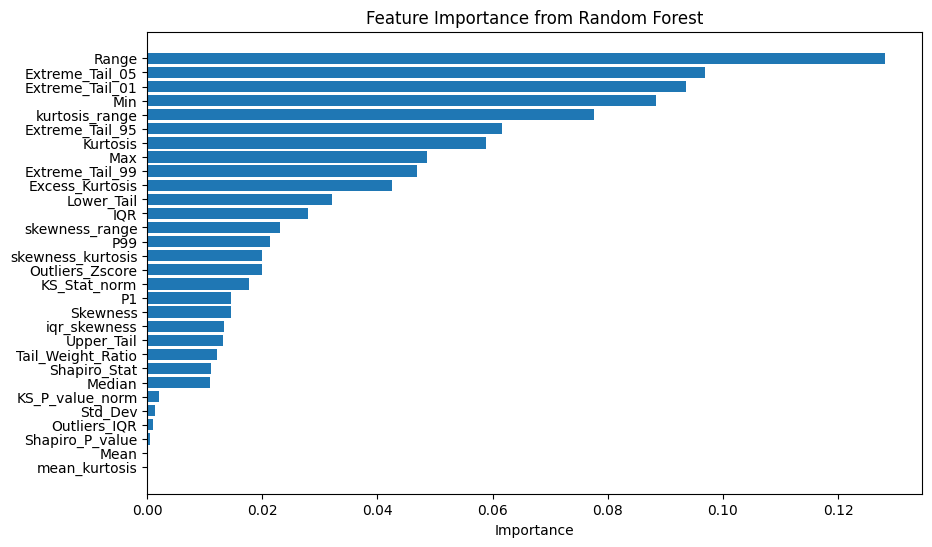

In [21]:
import pandas as pd
import matplotlib as plt

importances2 = new_model.feature_importances_

importance_df2 = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': importances2
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Dropping unimportant features

In [22]:
# least importance features
to_drop = list(importance_df2.sort_values(by='Importance', ascending=True)[:5]['Feature'])

In [24]:
def feature_dropping(train, test, variables: list):
    train_dropped = train.drop(variables, axis=1)
    test_dropped = test.drop(variables, axis=1)
    return train_dropped, test_dropped

In [42]:
dropped = feature_dropping(X_train2, X_test2, to_drop)

X_train3 = dropped[0]
X_test3 = dropped[1]

# Adding more weight for positive class

In [176]:
from sklearn.ensemble import RandomForestClassifier

newer_model = RandomForestClassifier(class_weight={0: 1, 1: 10}) # add more weight for positive class during training

newer_model.fit(X_train3, y_train)

y_pred3 = newer_model.predict(X_test3)

In [177]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.9463414634146341
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.93      0.96      0.94        98

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# Pickling this model that underwent feature crossing then dropping then reweighting, 94.6% accuracy and 96% recall

In [ ]:
import pickle

with open('yk_improved_model.pkl', 'wb') as file:
    pickle.dump(newer_model, file)

# Balancing dataset and retraining
no difference because dataset already well balanced

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train3, y_train)

model_smote = RandomForestClassifier(class_weight={0: 1, 1: 10})
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test3)

In [102]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.9463414634146341
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.93      0.96      0.94        98

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# Maximizing recall by altering threshold for prediction

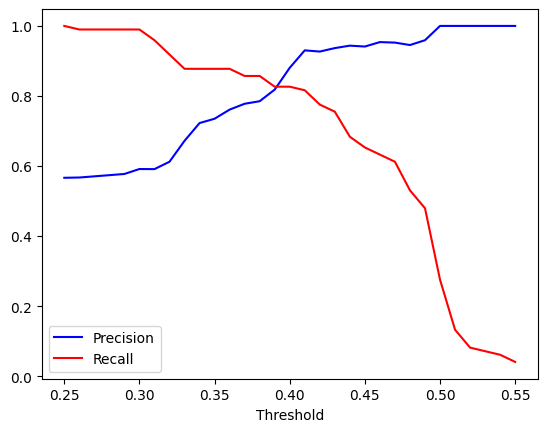

0.25


In [91]:
from sklearn.metrics import precision_recall_curve, roc_curve
import numpy as np

y_pred3_proba = model.predict_proba(X_test3)[:, 1]  # probabilities for the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_pred3_proba)

# choose optimal threshold
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# Find threshold that balances precision and recall or maximizes recall
# optimal_threshold = thresholds[np.argmax(recall - precision)]
# print(f"Optimal Threshold: {optimal_threshold}")

optimal_threshold = thresholds[np.argmax(recall)] 
print(optimal_threshold)

# predict using the new threshold
y_pred3_adjusted = (y_pred3_proba >= optimal_threshold).astype(int)
#y_pred3_adjusted = (y_pred3_proba >= 0.3).astype(int)


In [92]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred3_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred3_adjusted))

Accuracy: 0.6341463414634146
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46       107
           1       0.57      1.00      0.72        98

    accuracy                           0.63       205
   macro avg       0.78      0.65      0.59       205
weighted avg       0.79      0.63      0.59       205



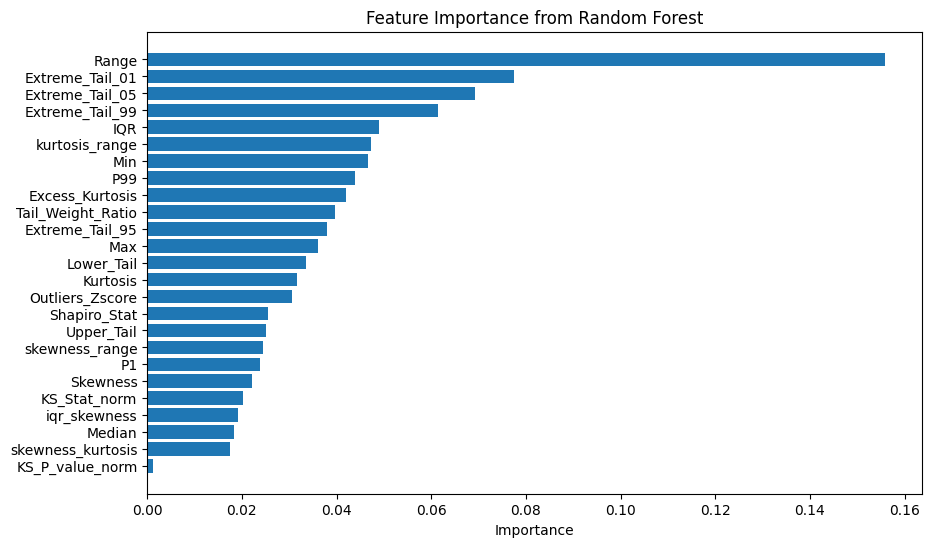

In [72]:
import pandas as pd
import matplotlib as plt

importances3 = newer_model.feature_importances_

importance_df3 = pd.DataFrame({
    'Feature': X_train3.columns,
    'Importance': importances3
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df3['Feature'], importance_df3['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [73]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (y_pred3 != 1)
unrecalled_points = X_test3[unrecalled_mask]

recalled_mask = (y_test == 1) & (y_pred3 == 1)
recalled_points = X_test3[recalled_mask]

# for negative class (other distributions)
negative_mask = (y_test == 0) & (y_pred3 == 0)
negative_points = X_test3[negative_mask]

In [74]:
yk_full_filled.iloc[unrecalled_points.index]

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
289,io18_pspd_high_pre_:dc_ioleakage@ATEST1[1],Outlier/Longtail,1,longtail,-1.111313e-13,-0.058764,1.000007,1.268141,0.354691,-0.191540,...,0.089119,-3.191540,2.398259,-1.960975,27,0,0.077159,0.000000e+00,0.979158,3.902359e-67
539,rfu_rx_gstep_2412_A_:rbb2_0db_ref_gain@2G5GTR_...,Outlier/Longtail,1,outlier,-1.062163e-13,0.177265,1.000008,0.600406,-3.583873,14.748311,...,0.067905,11.748311,1.088663,-4.622672,2711,0,0.223528,0.000000e+00,0.593166,6.563556e-143
532,rfu_rx_gstep_2412_A_:rbb2_-6db_ref_gain@2G5GTR...,Outlier/Longtail,1,outlier,6.887230e-13,0.172392,1.000008,0.810591,-3.006045,14.159397,...,0.064032,11.159397,1.365809,-4.321483,2569,0,0.149675,0.000000e+00,0.728762,1.072872e-130
526,rfu_rx_gstep_2412_A_:biquad_lpf_12db@2G5GTR_A[1],Outlier/Longtail,1,longtail,6.583248e-14,0.010747,1.000008,1.101479,-0.050802,-0.168533,...,0.128932,-3.168533,2.199002,-2.220751,5,0,0.050786,1.948087e-147,0.988460,1.702925e-54


In [34]:
yk_full_filled.iloc[recalled_points.index]

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
621,rfu_rx_gstep_5925_A_:rbb2_0db_ref_gain@2G5GTR_...,Outlier/Longtail,1,outlier,4.788694e-13,-0.003865,1.000008,1.167158,-3.935377,69.072493,...,0.045055,66.072493,2.086128,-1.961411,82,0,0.037977,1.535854e-82,0.837114,4.252347e-116
905,brf2_dut_devm_:rx_m32_devm_ch0@TDO[1],Outlier/Longtail,1,longtail,-1.029073e-15,-0.034722,1.000008,1.380516,0.303738,0.071032,...,0.035490,-2.928968,2.442085,-2.064892,171,0,0.032116,1.924501e-59,0.994085,1.024787e-42
948,rfu_swd_iqlpbk_patha_5g_:SNR_I_dB[1],Outlier/Longtail,1,longtail,-7.820363e-15,0.396948,1.000008,0.131319,-2.251567,3.638409,...,0.177925,0.638409,0.571973,-3.296676,2335,65505,0.414055,0.000000e+00,0.528743,1.914927e-147
680,rfu_rx_power_lpf_ip3_2412_B_:Gain_dB@2G5GTR_B[1],Outlier/Longtail,1,longtail,-9.073098e-14,0.068854,1.000008,0.590623,-21.911993,1000.920718,...,0.095131,997.920718,1.248836,-3.186429,1086,0,0.214873,0.000000e+00,0.473243,5.594630e-151
101,syspll_T3cpu_tps:VDDVCO_TCPU_50@ATEST0[1],Outlier/Longtail,1,longtail,-1.017814e-12,-0.069435,1.000008,1.396161,0.433477,0.619582,...,0.030891,-2.380418,2.544119,-2.013385,326,0,0.031226,3.494078e-56,0.988773,4.938062e-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,rfu_tx_gstep_4915_A_:tmixbuf_2_4db@2G5GTR_A[1],Outlier/Longtail,1,longtail,4.638860e-13,-0.013226,1.000008,1.102280,0.106864,2.157362,...,0.090279,-0.842638,2.822269,-2.720367,933,0,0.045149,6.552433e-116,0.975997,4.408512e-69
796,rfu_tx_gstep_2412_A_:ppa_-18db_ref@2G5GTR_A[1],Outlier/Longtail,1,longtail,9.459550e-14,-0.056146,1.000008,1.591054,-0.065137,-0.642157,...,0.007010,-3.642157,1.946184,-2.208161,87,0,0.049208,3.129884e-138,0.986566,2.257738e-57
644,rfu_rx_gstep_5925_B_:tia_1p6k@2G5GTR_B[1],Outlier/Longtail,1,outlier,1.309363e-12,0.004068,1.000008,0.953031,-81.110783,14020.874352,...,0.049321,14017.874352,1.710256,-1.702509,8,0,0.083005,0.000000e+00,0.538864,9.095032e-147
404,io33_pspd_low_post_:dc_ioleakage@GPIO8[1],Outlier/Longtail,1,longtail,2.727954e-13,-0.083456,1.000008,1.293424,0.496554,0.575611,...,0.054889,-2.424389,2.693030,-2.033317,379,0,0.037151,1.316746e-78,0.987008,1.173250e-56


In [31]:
unrecalled_points.describe()

,Median,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,Lower_Tail,Extreme_Tail_95,...,P99,P1,Outliers_Zscore,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,skewness_kurtosis,skewness_range,kurtosis_range,iqr_skewness
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.075410,0.945154,-1.571507,7.136909,-8.377250,2.762147,11.139397,0.401160,1.961429,1.400373,...,1.762933,-3.281470,1328.000000,0.125287,4.870218e-148,0.822387,-23.869807,-25.280762,113.338529,-1.048653
std,0.118271,0.297611,2.010829,8.452306,6.283078,1.215980,5.472085,0.132787,1.796126,0.878839,...,0.634073,1.384351,1516.102459,0.077702,9.740435e-148,0.194478,27.847045,30.553758,132.511310,1.457656
min,-0.058764,0.600406,-3.583873,-0.191540,-14.651065,1.824401,5.694370,0.248263,0.396294,0.758022,...,1.088663,-4.622672,5.000000,0.050786,0.000000e+00,0.593166,-52.856072,-52.812960,-1.396672,-2.436671
25%,-0.006631,0.758044,-3.150502,-0.174284,-13.346676,2.094146,6.892450,0.321880,0.433782,0.927507,...,1.296522,-4.396780,21.500000,0.070566,0.000000e+00,0.694863,-45.136854,-51.158593,-1.068934,-2.223002
50%,0.091570,0.956035,-1.528423,6.995432,-8.052186,2.342970,11.014046,0.400782,1.820303,1.074336,...,1.782406,-3.271117,1298.000000,0.113417,0.000000e+00,0.853960,-21.315859,-25.448211,108.187782,-1.103868
75%,0.173610,1.143145,0.050571,14.306626,-3.082759,3.010971,15.260992,0.480062,3.347949,1.547203,...,2.248817,-2.155807,2604.500000,0.168138,4.870218e-148,0.981484,-0.048813,0.429620,222.595245,0.070481
max,0.177265,1.268141,0.354691,14.748311,-2.753563,4.538247,16.835125,0.554812,3.808815,2.694799,...,2.398259,-1.960975,2711.000000,0.223528,1.948087e-147,0.988460,0.008562,2.586336,238.375224,0.449798


In [32]:
recalled_points.describe()

,Median,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,Lower_Tail,Extreme_Tail_95,...,P99,P1,Outliers_Zscore,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,skewness_kurtosis,skewness_range,kurtosis_range,iqr_skewness
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,9.400000e+01,94.000000,9.400000e+01,94.000000
mean,-0.034782,1.191683,-9.542616,1912.456126,-34.232701,13.198491,47.431192,0.634761,0.633080,11.738557,...,2.094695,-2.029912,284.478723,0.083796,1.272026e-02,0.829275,-1.097783e+05,-1069.907330,3.366444e+05,-5.084659
std,0.150628,0.352546,36.334864,6220.730436,42.233783,27.444813,48.744682,0.326139,0.466896,27.480346,...,0.603276,0.690714,431.016521,0.106488,7.737935e-02,0.261495,9.975085e+05,7040.697855,1.339957e+06,19.721259
min,-0.745631,0.131319,-170.866417,-0.825846,-198.429891,0.709779,4.363679,0.000000,0.000000,0.187126,...,0.571973,-4.532855,2.000000,0.002858,0.000000e+00,0.062613,-5.364529e+06,-34124.647297,-6.373784e+00,-81.635361
25%,-0.045672,1.150322,-3.685945,0.651710,-47.104819,3.598231,11.596935,0.501792,0.450280,2.199518,...,1.951732,-2.295735,66.000000,0.017878,0.000000e+00,0.824028,-6.216076e+02,-189.262295,8.246720e+00,-4.737826
50%,-0.011146,1.295068,-0.308518,18.992052,-15.712988,4.955544,34.102518,0.661099,0.615228,3.406120,...,2.259584,-2.207126,166.000000,0.032923,3.230663e-60,0.949960,-3.687272e-01,-4.667583,7.345514e+02,-0.295492
75%,0.004109,1.335489,0.269196,257.750089,-5.853014,6.931255,61.105808,0.754422,0.687072,5.198580,...,2.439581,-1.829510,316.250000,0.091786,1.925684e-18,0.986939,1.326405e-01,3.002978,1.547392e+04,0.375276
max,0.396948,1.961446,160.482471,35701.713870,-2.408359,219.816872,265.242062,1.491007,3.617764,219.025789,...,3.253290,-0.247835,2587.000000,0.414055,6.566710e-01,0.999682,5.729499e+06,42566.701647,9.469596e+06,100.626851


# Trying to predict outlier separately

In [134]:
y_train_indexes = pd.Series(y_train.index)
y_train_target = yk_full_filled.iloc[y_train_indexes]
y_train_outlier = (y_train_target['Distribution Type'] == 'outlier').astype(int)
y_train_outlier

y_test_indexes = pd.Series(y_test.index)
y_test_target = yk_full_filled.iloc[y_test_indexes]
y_test_outlier = (y_test_target['Distribution Type'] == 'outlier').astype(int)
y_test_outlier

527    0
359    0
447    0
31     0
621    1
      ..
832    0
796    0
644    1
404    0
842    1
Name: Distribution Type, Length: 205, dtype: int64

In [148]:
from sklearn.ensemble import RandomForestClassifier

outlier_model = RandomForestClassifier(class_weight={0: 1, 1: 10}) # add more weight for positive class during training

outlier_model.fit(X_train3, y_train_outlier)

y_pred_outlier = outlier_model.predict(X_test3)

In [149]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test_outlier, y_pred_outlier))
print("Classification Report:\n", classification_report(y_test_outlier, y_pred_outlier))

Accuracy: 0.9512195121951219
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.92      0.92      0.92        61

    accuracy                           0.95       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205



# Trying to predict longtail separately

In [ ]:
y_train_indexes = pd.Series(y_train.index)
y_train_target = yk_full_filled.iloc[y_train_indexes]
y_train_longtail = (y_train_target['Distribution Type'] == 'longtail').astype(int)

y_test_indexes = pd.Series(y_test.index)
y_test_target = yk_full_filled.iloc[y_test_indexes]
y_test_longtail = (y_test_target['Distribution Type'] == 'longtail').astype(int)

In [160]:
from sklearn.ensemble import RandomForestClassifier

longtail_model = RandomForestClassifier(class_weight={0: 1, 1: 10}) # add more weight for positive class during training

longtail_model.fit(X_train3, y_train_longtail)

y_pred_longtail = longtail_model.predict(X_test3)

In [161]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test_longtail, y_pred_longtail))
print("Classification Report:\n", classification_report(y_test_longtail, y_pred_longtail))

Accuracy: 0.9365853658536586
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       168
           1       0.83      0.81      0.82        37

    accuracy                           0.94       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.94      0.94      0.94       205



# Creating stacked model

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacked model
stacked_model.fit(X_train, y_train)
